[Dataset](https://www.google.com/url?q=https://www.kaggle.com/datasets/imranbukhari/comprehensive-ethusd-1m-data/data&sa=D&source=docs&ust=1730502587695059&usg=AOvVaw3kMqZe-yQhr2LT-L_PQyeM)

In [3]:
# ### download dataset to colab
# #!/bin/bash
# !curl -L -o archive.zip\
# https://www.kaggle.com/api/v1/datasets/download/imranbukhari/comprehensive-ethusd-1m-data
# !unzip archive.zip

In [2]:
### import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# # ### read data files
# common_columns = ['Open time', 'Open', 'High', 'Low', 'Volume', 'Close']
# dataset_files = [
#     'ETHUSD_1m_Binance.csv',
#     'ETHUSD_1m_BitMEX.csv',
#     'ETHUSD_1m_Bitfinex.csv',
#     'ETHUSD_1m_Bitstamp.csv',
#     'ETHUSD_1m_Coinbase.csv',
#     'ETHUSD_1m_Combined_Index.csv',
#     'ETHUSD_1m_KuCoin.csv',
#     'ETHUSD_1m_OKX.csv'
# ]

# dataframes = []

# for filename in dataset_files:
#   df = pd.read_csv(filename)[common_columns]
#   dataframes.append(df)
#   print(filename)
#   print(f'shape: {df.shape}')

In [28]:
df = pd.read_csv('ethereum_data.csv')
df

,Open time,Open,High,Low,Volume,Close
0,2017-08-17 04:00:00,301.13,301.13,301.13,0.42643,301.13
1,2017-08-17 04:01:00,301.13,301.13,301.13,2.75787,301.13
2,2017-08-17 04:02:00,300.00,300.00,300.00,0.09930,300.00
3,2017-08-17 04:03:00,300.00,300.00,300.00,0.31389,300.00
4,2017-08-17 04:04:00,301.13,301.13,301.13,0.23202,301.13
...,...,...,...,...,...,...
999995,2019-07-16 10:57:00,224.87,224.88,224.40,137.95055,224.53
999996,2019-07-16 10:58:00,224.54,225.04,224.54,117.22030,225.04
999997,2019-07-16 10:59:00,225.02,225.19,224.75,227.79963,224.80
999998,2019-07-16 11:00:00,224.83,224.93,224.55,128.93852,224.61


In [29]:
# ### concat dataframes
# df = pd.concat(dataframes, ignore_index=True)
# df

In [30]:
# Shape of data
print(f'shape of data: {df.shape}')

shape of data: (1000000, 6)


In [31]:
# change in price feature
df = df.assign(ChangeinPrice=df['Close']- df['Open'])

In [32]:
descriptions = [
    'The timestamp, in UTC date format, when the candlestick (price bar) opens.',
    'The price of the asset at the beginning of the trading period.',
    'The highest price of the asset during the trading period.',
    'The lowest price of the asset during the trading period.',
    'The price of the asset at the end of the trading period.',
    'The price of the asset at the end of the trading period.',
    'The change in price of the asset between the start and end of the trading period'
]


info_table = pd.DataFrame({
    "Data Type": df.dtypes,
    "Null Count": df.isna().sum(),
    'Description': descriptions
})

info_table

,Data Type,Null Count,Description
Open time,object,0,"The timestamp, in UTC date format, when the ca..."
Open,float64,0,The price of the asset at the beginning of the...
High,float64,0,The highest price of the asset during the trad...
Low,float64,0,The lowest price of the asset during the tradi...
Volume,float64,0,The price of the asset at the end of the tradi...
Close,float64,0,The price of the asset at the end of the tradi...
ChangeinPrice,float64,0,The change in price of the asset between the s...


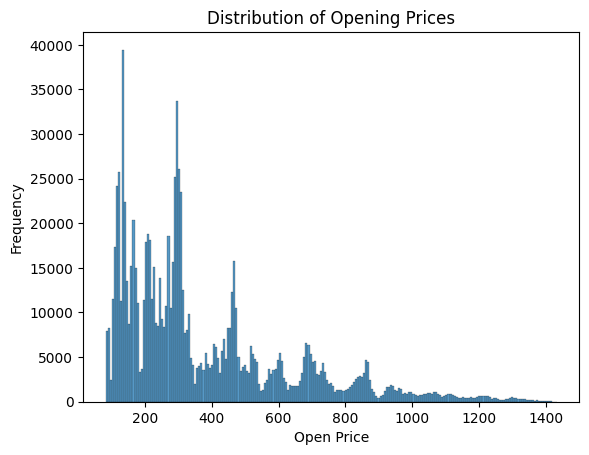

In [33]:
sns.histplot(data= df, x = 'Open')
plt.xlabel('Open Price')
plt.ylabel('Frequency')
plt.title('Distribution of Opening Prices')
plt.show()

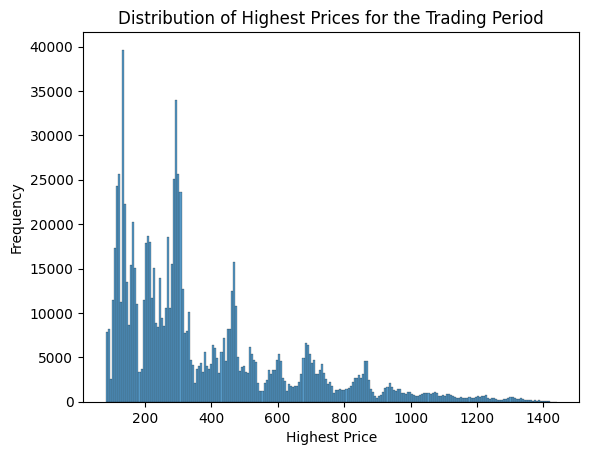

In [34]:
sns.histplot(data= df, x = 'High')
plt.xlabel('Highest Price')
plt.ylabel('Frequency')
plt.title('Distribution of Highest Prices for the Trading Period')
plt.show()

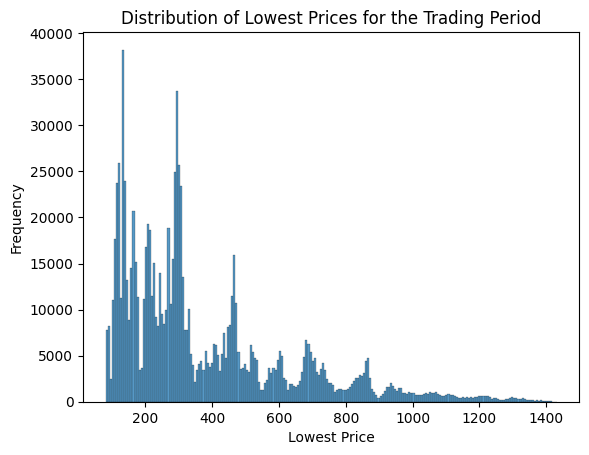

In [35]:
sns.histplot(data= df, x = 'Low')
plt.xlabel('Lowest Price')
plt.ylabel('Frequency')
plt.title('Distribution of Lowest Prices for the Trading Period')
plt.show()

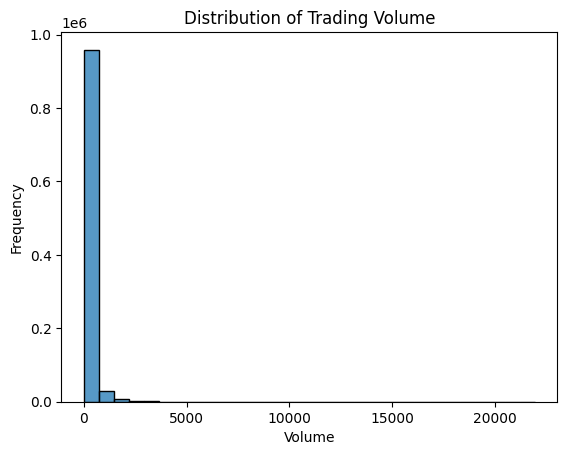

In [36]:
sns.histplot(data= df, x = 'Volume', bins = 30)
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Trading Volume')
plt.show()

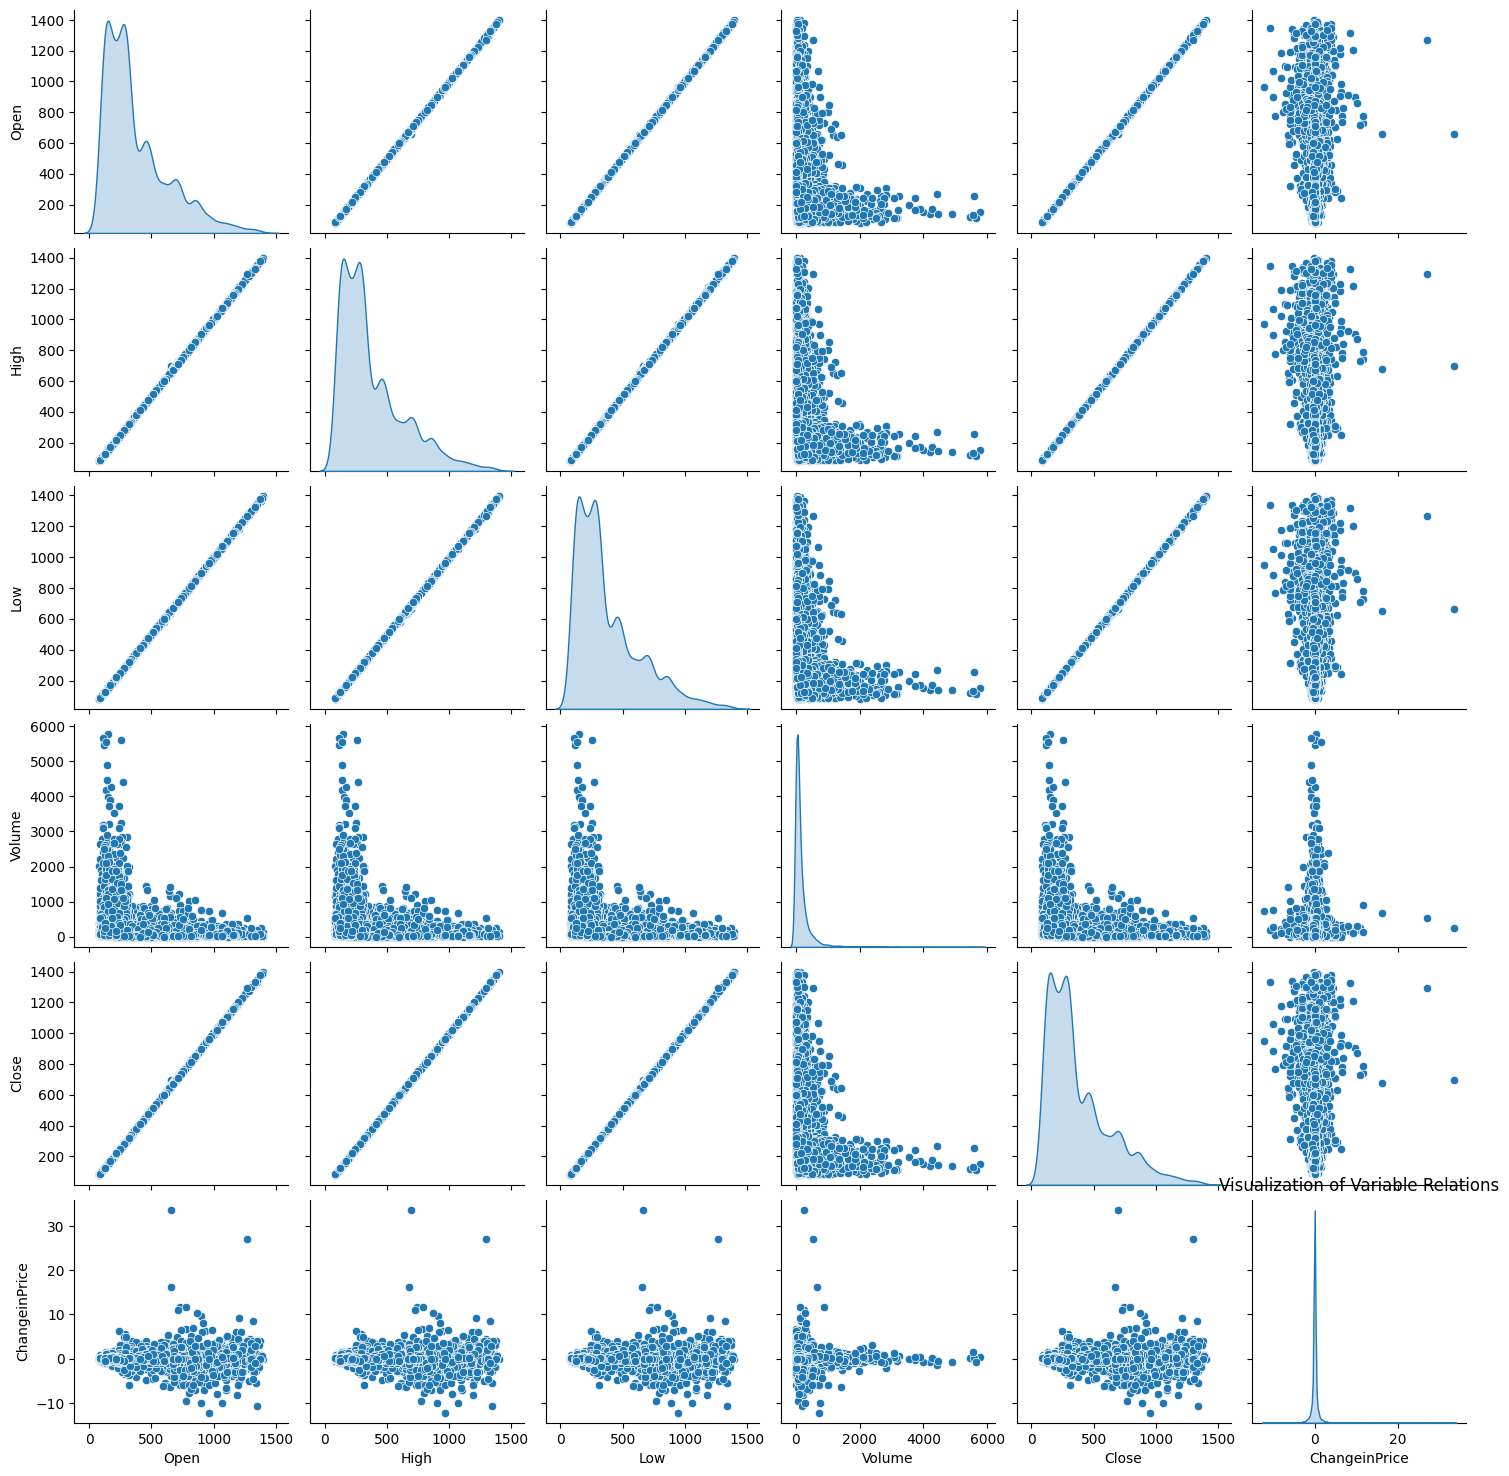

In [37]:
df_sampled = df.sample(n=10000, random_state=1)
sns.pairplot(df_sampled.drop(columns=['Open time']), diag_kind='kde')
plt.title('Visualization of Variable Relations')
plt.show()

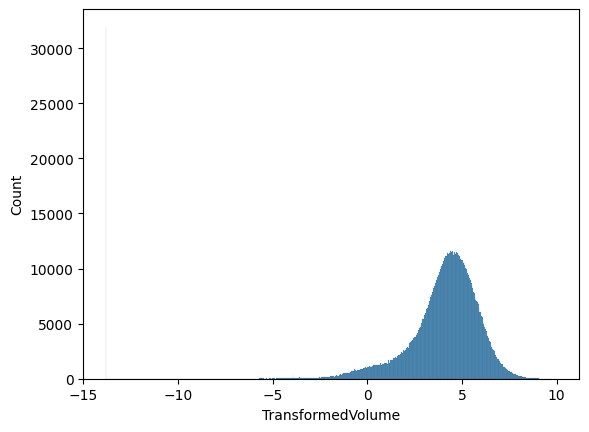

In [38]:
df['TransformedVolume'] = np.log(df['Volume'] + 0.000001)
sns.histplot(data=df, x = 'TransformedVolume')
plt.show()

In [39]:
from sklearn.preprocessing import MinMaxScaler

numeric_cols = ['Open',    'High',    'Low','Volume', 'ChangeinPrice', 'TransformedVolume']
scaler = MinMaxScaler()
numeric_df = df.drop(columns = ['Close']).select_dtypes(include=[float, int])
scaled_data = scaler.fit_transform(numeric_df)
df[numeric_df.columns] = scaled_data

df

,Open time,Open,High,Low,Volume,Close,ChangeinPrice,TransformedVolume
0,2017-08-17 04:00:00,0.162186,0.161313,0.162569,0.000019,301.13,0.276847,0.544395
1,2017-08-17 04:01:00,0.162186,0.161313,0.162569,0.000126,301.13,0.276847,0.622790
2,2017-08-17 04:02:00,0.161350,0.160481,0.161732,0.000005,300.00,0.276847,0.483195
3,2017-08-17 04:03:00,0.161350,0.160481,0.161732,0.000014,300.00,0.276847,0.531527
4,2017-08-17 04:04:00,0.162186,0.161313,0.162569,0.000011,301.13,0.276847,0.518836
...,...,...,...,...,...,...,...,...
999995,2019-07-16 10:57:00,0.105738,0.105161,0.105699,0.006284,224.53,0.275298,0.787095
999996,2019-07-16 10:58:00,0.105494,0.105279,0.105803,0.005340,225.04,0.279124,0.780256
999997,2019-07-16 10:59:00,0.105849,0.105389,0.105958,0.010377,224.80,0.275845,0.808158
999998,2019-07-16 11:00:00,0.105708,0.105198,0.105810,0.005874,224.61,0.275845,0.784258


In [49]:
# initial model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures


X = df[['Open', 'High', 'Low', 'TransformedVolume']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict and calculate errors
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

# close_std = df['Close'].std()
# train_error /= close_std
# test_error /= close_std

# print('train error in Close stds:', train_error)
# print('test error in Close stds:', test_error)

print('train error:', train_error)
print('test error:', test_error)


train error: 0.35930276985374204
test error: 0.3475293769385269


In [50]:
# coefficients = model.coef_  # Array of coefficients for each feature
# intercept = model.intercept_

In [51]:
# x_line = np.linspace(min(X['Open']), max(X['Open']), 100)  # Generate X values
# y_line = coefficients[0]* x_line + intercept  # Compute corresponding Y values
# plt.plot(x_line, y_line, color='red', label='Regression Line')
# plt.scatter(X['Open'], y, color='blue', label='Data Points')

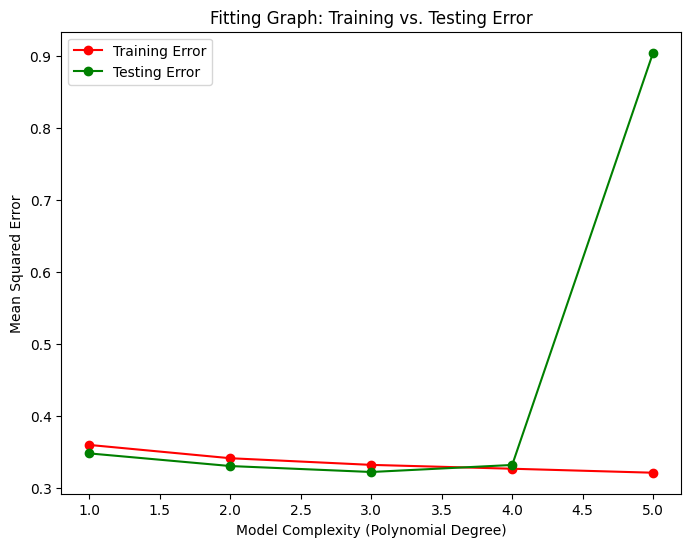

In [52]:
# Iterate through different model complexities (polynomial degrees)
degrees = [1, 2, 3, 4 ,5]
train_errors = []
test_errors = []

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict and calculate errors
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Plot training and testing error
plt.figure(figsize=(8, 6))
plt.plot(degrees, train_errors, label='Training Error', marker='o', color='red')
plt.plot(degrees, test_errors, label='Testing Error', marker='o', color='green')
# plt.axvline(x=np.argmin(test_errors) + 1, linestyle='--', color='blue', label='Optimal Complexity')

# Add labels and legend
plt.title('Fitting Graph: Training vs. Testing Error')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

Answer the questions: Where does your model fit in the fitting graph? and What are the next models you are thinking of and why?

Our model fits at a polynomial degree of 1, but looking at the fitting graph, this corresponds with a low testing error and training error suggesting that it strikes a good balance between underfitting and overfitting, but it seems that a model with a higher degree will show lower training error, but higher testing error, indicating overfitting. We will consider using a higher degree in the next model. The next model we plan to use is a classification model. As we created the change in price column, we plan to classify them by negative or positive change, instead of predicting the closing value. This will allow us to learn more about our data, and give us insight about market behavior. This would also give us results that are easy to interpret. We may also try a decision trees model, as this would be very easy to interpret at each decision node and would be resistant to any outliers we may have. 


Conclusion section: What is the conclusion of your 1st model? What can be done to possibly improve it?

Our first model obtained an mse of 0.3475293769385269. This means the average of the squared differences between the predicted closing price and actual closing price is around 0.35. In order to improve it, we may need to create new features that combine the ones already present. Additionally, employing k-fold cross-validation ensures that our evaluation process is robust and unbiased. By splitting the data into k subsets (folds) and iteratively training and validating the model on different folds, we can effectively use all available data for both training and validation. This reduces the risk of overfitting to a specific train-test split and provides a more accurate estimate of the model's generalization performance. Combining these approaches, we can likely reduce the MSE, resulting in a model that is not only more accurate but also more reliable across diverse datasets.